## Ciao raga

Elisabetta ti odio  solo per il fatto che non leggerai mai questo codice.
Ciao Antonino.nfjdshfuidsfcewd
Ciao **SIMONINI**fdjfdsj


aggiungo altre coseeeeee
altre cose per prova


provo di nuovo





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import odr
import iminuit
from iminuit import Minuit

ModuleNotFoundError: No module named 'iminuit'

In [2]:
df = pd.read_excel(r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Magistrale\Laboratorio_4\Esperienze_lab\Esperienza1\Misura_Kb_tensione.xlsx" )

c = df["Capacità (nF)"]
err_c = df["Err C (nF)"]

v = df["V2 (V)"]
err_v = df["Err V ( V)"]

c_rev = 1 / c
err_c_rev = err_c/ c**2


In [3]:
df

,Capacità (nF),V2 (V),Err C (nF),Err V ( V)
0,10,1,1,1
1,9,2,1,1
2,8,3,1,1
3,7,4,1,1
4,6,5,1,1
5,5,6,1,1
6,5,7,1,1
7,4,8,1,1
8,3,9,1,1


Il modello è $y = a x + b$ 

 $V_2 = \frac{K_B T}{U^* C}$

 con $y = V_2$,  $a = \frac{K_B T}{U^* C}$ ,  x = 1/C

 supponiamo che:

- $T = 25 °C = 300 K$
- $U^* = \frac{U_m}{Y^2} \frac{R_1}{R_1 + R_2} \frac{R_V + R_{av}}{R_V}$
 con $U_m = 10 V,  Y = 1.01·10^6 , R_2 = 9R_1, R_{av} = 1.5 M \Omega $


Fit lineare con Minuit nel caso in cui gli errori sulle x siano effettivamente trascurabili


 ### FIT LINEARE NEL CASO IN CUI NON SIANO TRASCURABILI GLI ERRORI SULLE X

In [4]:
T  = 300 
U_star = 10/(1.01 * 10**6)**2 /10 * 1 # aggiustare, non so il valoroe di R_V

def linear_func(B, x):
        return B[0] * x + B[1]

def fit_lineare(x,y, errx, erry):
    
    

    linear_model = odr.Model(linear_func) 

    data = odr.RealData(x, y, sx=errx, sy= erry)

    fit = odr.ODR(data, linear_model, beta0=[1, 0])  # parametri iniziali [pendenza, intercetta]

    output = fit.run()
    par, cov = output.beta, output.cov_beta
    dev_std = output.sd_beta
    
    return par, dev_std
 
 


In [5]:
par, dev_std = fit_lineare(c_rev, v, err_c_rev, err_v)
print(f"coefficiente angolare m = {par[0]:.2f} +- {dev_std[0]:.2f} ")
print(f"intercetta q = {par[1]:.2f} +- {dev_std[1]:.2f} ")
print(dev_std)

coefficiente angolare m = 49.14 +- 5.23 
intercetta q = -3.46 +- 0.75 
[5.23167183 0.74582865]


Text(0, 0.5, 'V (V)')

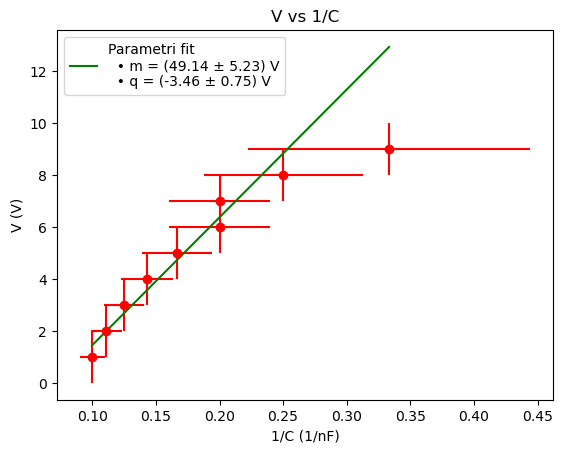

In [6]:
plt.errorbar(c_rev, v, yerr = err_v, xerr = err_c_rev,fmt = "o", color = "red")
label_fit = (
    "Parametri fit"
    "\n  • " + f"m = ({par[0]:.2f} ± {dev_std[0]:.2f}) V"
    "\n  • " + f"q = ({par[1]:.2f} ± {dev_std[1]:.2f}) V"
)
plt.plot(
    c_rev,
    linear_func(par, c_rev),
    color="green",
    label=label_fit)
plt.title("V vs 1/C")
plt.xlabel("1/C (1/nF)")
plt.legend()
plt.ylabel("V (V)")

In [7]:
print(v)


0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: V2 (V), dtype: int64


## Algoritmo per la convergeza di K_B

Nota bene: in questo processo vanno DIVISI  per $Z$ i valori ORIGINARIAMENTE misurati di $V_2$

In [8]:
eff = 5
count = 0
iter_max = 100
Z = [2,2,2,2,2,2,2,2,2]  # sarà una lista da riempire con i vari valori delle capacità
Z = np.array(Z)

v_new = []
 
while eff > 0.01 and count < iter_max:
    
    par, dev_std = fit_lineare(c_rev, v, err_c_rev, err_v)
    m, q = par
    
    v_new = (v - q) / Z
    
    
    #con questi nuovi valori devo fare il nuovo fit
     
    par1, dev_std1 = fit_lineare(c_rev, v_new,err_c_rev, err_v ) 
    m1, q1 = par1
    
    eff = abs(q - q1)
    
    v = v_temp.copy()
    count += 1
    
    
    
    
    # l'errore sul v_new è diverso da quello di prima
    # perché v_new = V (misurato con errore del tester) + q(V,C) (ricavato col fit, con l'errore di ODR, che dipende da V)
    # quindi ora ci metto quello err_v, è un'altro errore, che probabilmente ha dentro un termine di covarianza
    
print(f"Convergenza raggiunta dopo {count} iterazioni: q → {q1:.3f}")

NameError: name 'v_temp' is not defined